In [1]:
import pandas as pd
pd.__version__

'0.25.1'

In [2]:
arr = [0,1,2,3,4,5]
df = pd.Series(arr)#如果不指定索引，默认从0开始
df

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

In [3]:
df[0]

0

In [4]:
d  = {'a':1,'b':2,'c':3}
df = pd.Series(d)
df

a    1
b    2
c    3
dtype: int64

In [5]:
import numpy as np

In [6]:
dates = pd.date_range('today',periods=6) # 定义时间序列作为 index
num_arr = np.random.randn(6,4) # 传入 numpy 随机数组
columns = ['A','B','C','D'] # 将列表作为列名
df1 = pd.DataFrame(num_arr, index = dates, columns = columns)
df1

,A,B,C,D
2020-01-12 15:00:16.432107,1.112975,0.318679,0.568480,-0.655195
2020-01-13 15:00:16.432107,-1.112316,0.986265,-0.039449,0.280134
2020-01-14 15:00:16.432107,0.090075,-0.823501,0.485604,-1.302143
2020-01-15 15:00:16.432107,0.979515,-0.300246,0.794784,-0.135182
2020-01-16 15:00:16.432107,-0.016408,-1.561346,0.932222,1.003783
2020-01-17 15:00:16.432107,-0.024507,-1.061379,-0.447147,0.303021


In [7]:
dates

DatetimeIndex(['2020-01-12 15:00:16.432107', '2020-01-13 15:00:16.432107',
               '2020-01-14 15:00:16.432107', '2020-01-15 15:00:16.432107',
               '2020-01-16 15:00:16.432107', '2020-01-17 15:00:16.432107'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.read_excel('test.xlsx')

In [9]:
df

,Unnamed: 0,姓名,年龄,学号
0,1,zwk,17,1
1,2,wjz,18,2
2,3,fzz,19,3
3,4,mmx,20,4
4,5,dxd,21,5
5,6,lzt,22,6


In [10]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


In [12]:
df.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


In [13]:
df.iloc[3]
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [14]:
#df.loc[:,['animal','age']]
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [15]:
df.loc[df.index[[3,4,8]],['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [16]:
df[df['age']>3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


In [17]:
df['age']>3

a    False
b    False
c    False
d    False
e     True
f    False
g     True
h    False
i     True
j    False
Name: age, dtype: bool

In [18]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [19]:
#修改f行的age 为1.5
df.loc['f','age']=1.5

In [20]:
df['visits'].sum()

19

In [21]:
#计算每个不同种类animal的age的平均数
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

In [22]:
#插入
df.loc['k'] = [5.5, 'dog', 'no', 2]
# 删除
df = df.drop('k')
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7,2,no
j,dog,3,1,no


In [23]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

In [24]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7,2,no
e,dog,5,2,no
g,snake,4.5,1,no
j,dog,3,1,no
b,cat,3,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [25]:
df.loc['j','age']=5
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7,2,no
j,dog,5,1,no


In [26]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7,2,False
j,dog,5,1,False


In [27]:
df['animal'] = df['animal'].replace('snake', 'python')
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7,2,False
j,dog,5,1,False


In [28]:
"""对每种animal的每种不同数量visits，计算平均age，
即，返回一个表格，行是aniaml种类，列是visits数量，
表格值是行动物种类列访客数量的平均年龄"""
#df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

'对每种animal的每种不同数量visits，计算平均age，\n即，返回一个表格，行是aniaml种类，列是visits数量，\n表格值是行动物种类列访客数量的平均年龄'

# 进阶操作

In [29]:
#有一列整数列A的DatraFrame，删除数值重复的行
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
print(df)
df1 = df.loc[df['A'].shift() != df['A']]
# 方法二
# df1 = df.drop_duplicates(subset='A')
print(df1)

    A
0   1
1   2
2   2
3   3
4   4
5   5
6   5
7   5
8   6
9   7
10  7
   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


In [30]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df1 = df.sub(df.mean(axis=1), axis=0)
print(df1)

          0         1         2
0  0.048710  0.411229  0.883795
1  0.830888  0.064300  0.778061
2  0.310769  0.422750  0.110374
3  0.297817  0.434622  0.823869
4  0.840612  0.898010  0.071147
          0         1         2
0 -0.399201 -0.036682  0.435884
1  0.273138 -0.493449  0.220311
2  0.029471  0.141452 -0.170923
3 -0.220953 -0.084147  0.305100
4  0.237356  0.294754 -0.532110


In [31]:
df = pd.DataFrame(np.random.random(size=(5, 5)), columns=list('abcde'))
print(df)
df.sum().idxmin()

          a         b         c         d         e
0  0.705643  0.936951  0.874597  0.039833  0.609198
1  0.393568  0.080809  0.059099  0.228838  0.271779
2  0.078262  0.181768  0.324941  0.095460  0.864852
3  0.243307  0.047517  0.134326  0.778276  0.185462
4  0.034819  0.868948  0.645979  0.764672  0.230142


'a'

In [32]:
#给定DataFrame，求A列每个值的前3大的B的值的和
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df)
df1 = df.groupby('A')['B'].nlargest(3).sum(level=0)
print(df1)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87
A
a    409
b    156
c    345
Name: B, dtype: int64


In [33]:
#一个全数值的DataFrame，返回最大3个值的坐标
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df.unstack().sort_values()[-3:].index.tolist()

          0         1         2
0  0.187097  0.951158  0.369336
1  0.146172  0.560193  0.995093
2  0.417387  0.483656  0.274984
3  0.931423  0.738782  0.679098
4  0.219792  0.568059  0.415824


[(0, 3), (1, 0), (2, 1)]

In [34]:
#给定DataFrame，将负值代替为同组的平均值
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [-12,345,3,1,45,14,4,-52,54,23,-235,21,57,3,87]})
print(df)

def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df['vals'] = df.groupby(['grps'])['vals'].transform(replace)
print(df)

   grps  vals
0     a   -12
1     a   345
2     a     3
3     b     1
4     b    45
5     c    14
6     a     4
7     a   -52
8     b    54
9     c    23
10    c  -235
11    c    21
12    b    57
13    b     3
14    c    87
   grps        vals
0     a  117.333333
1     a  345.000000
2     a    3.000000
3     b    1.000000
4     b   45.000000
5     c   14.000000
6     a    4.000000
7     a  117.333333
8     b   54.000000
9     c   23.000000
10    c   36.250000
11    c   21.000000
12    b   57.000000
13    b    3.000000
14    c   87.000000


In [35]:
# 计算3位滑动窗口的平均值，忽略NAN
df = pd.DataFrame({'group': list('aabbabbbabab'),
                    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
print(df)

g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value'] 

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count()
s.reset_index(level=0, drop=True).sort_index()

   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

# 数据清洗

In [36]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


37. FlightNumber列中有些值缺失了，他们本来应该是每一行增加10，填充缺失的数值，并且令数据类型为整数

In [37]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


38. 将From_To列从_分开，分成From, To两列，并删除原始列

In [38]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
df = df.join(temp)
df = df.drop('From_To', axis=1)
df  

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


39. 将From, To大小写统一首字母大写其余小写

In [39]:
df['From'] = df['From'].str.capitalize()
df['To'] = df['To'].str.capitalize()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


40. Airline列，有一些多余的标点符号，需要提取出正确的航司名称。举例：'(British Airways. )' 应该改为 'British Airways'.

In [40]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


41. Airline列，数据被以列表的形式录入，但是我们希望每个数字被录入成单独一列，delay_1, delay_2, ...没有的用NAN替代。

In [41]:
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


In [42]:
df.shape

(5, 7)

In [43]:
df.dtypes

FlightNumber      int32
Airline          object
From             object
To               object
delay_1         float64
delay_2         float64
delay_3         float64
dtype: object

In [44]:
df.isnull()

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,False,False,False,False,False,False,True
1,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True
4,False,False,False,False,False,False,True


In [45]:
df.describe()

,FlightNumber,delay_1,delay_2,delay_3
count,5.000000,4.00000,3.000000,1.0
mean,10065.000000,31.75000,40.666667,87.0
std,15.811388,24.01909,7.767453,NaN
min,10045.000000,13.00000,32.000000,87.0
25%,10055.000000,20.50000,37.500000,87.0
50%,10065.000000,23.50000,43.000000,87.0
75%,10075.000000,34.75000,45.000000,87.0
max,10085.000000,67.00000,47.000000,87.0


In [47]:
df.corr()

,FlightNumber,delay_1,delay_2,delay_3
FlightNumber,1.000000,0.562728,-0.965567,NaN
delay_1,0.562728,1.000000,-0.971216,NaN
delay_2,-0.965567,-0.971216,1.000000,NaN
delay_3,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170FA63FC08>,
      dtype=object)

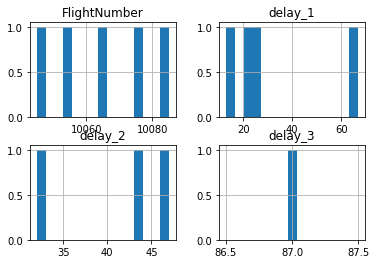

In [49]:
df.hist(bins=15)

D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


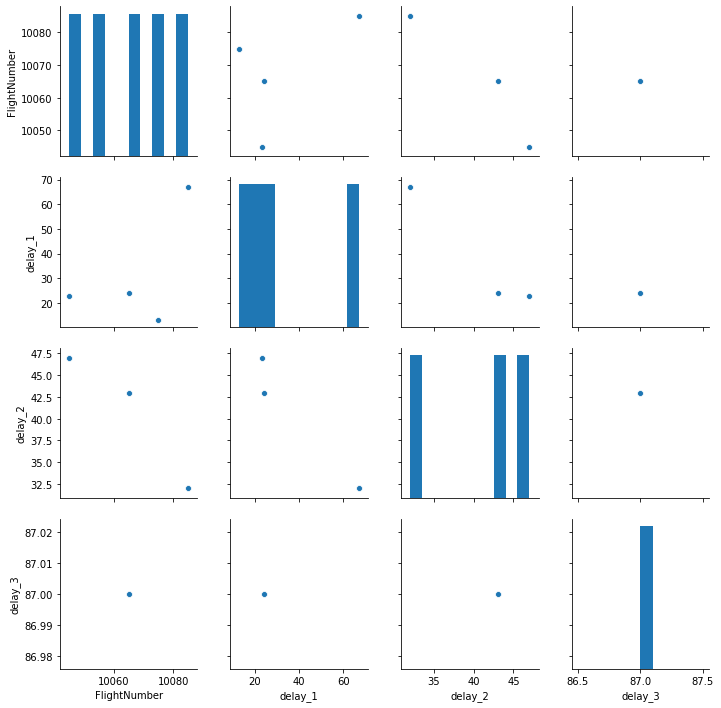

In [51]:
import seaborn as sns
sns.pairplot(df)

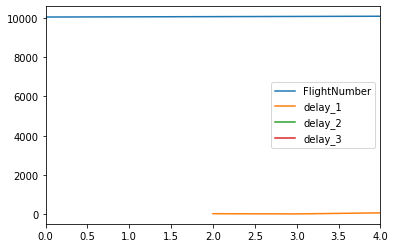

In [52]:
df.plot()


## plot是一个非常大的库，通过调整参数可以绘制各种库

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000170FFC62208>,
      dtype=object)

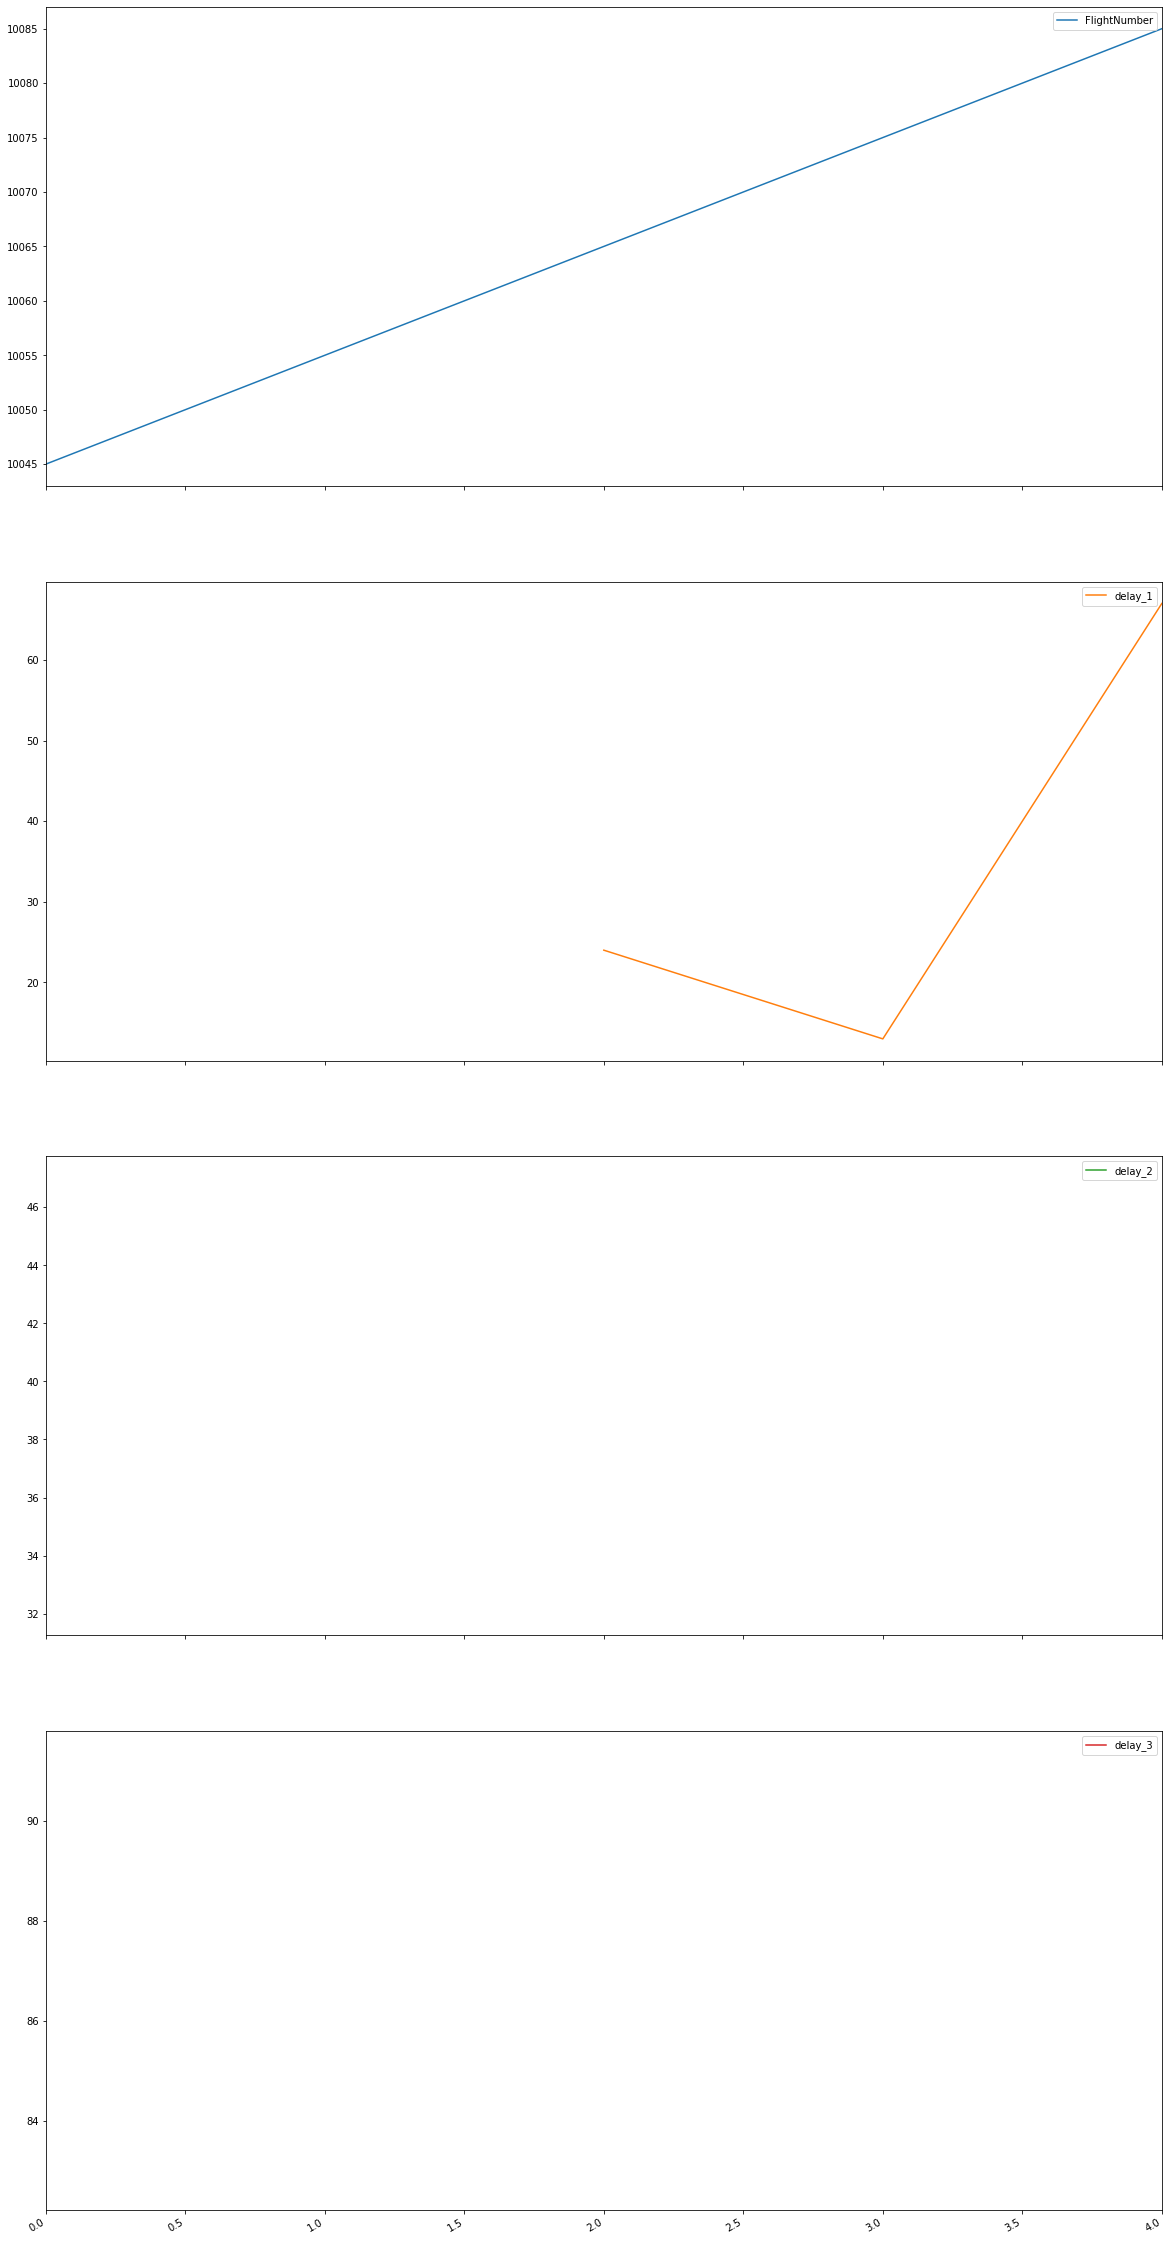

In [54]:
df.plot(subplots=True,figsize=(20,45))

# 层次化索引

#42. 用 letters = ['A', 'B', 'C']和 numbers = list(range(10))的组合作为系列随机值的层次化索引


In [55]:
letters = ['A', 'B', 'C']
numbers = list(range(4))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(12), index=mi)
s

A  0    0.577931
   1    0.465882
   2    0.653279
   3    0.417712
B  0    0.701795
   1    0.174178
   2    0.332723
   3    0.636940
C  0    0.023635
   1    0.094995
   2    0.686276
   3    0.053368
dtype: float64

43. 检查s是否是字典顺序排序的

In [56]:
s.index.is_lexsorted()
# 方法二
# s.index.lexsort_depth == s.index.nlevels

True

44. 选择二级索引为1, 3的行

In [57]:
s.loc[:, [1, 3]]

A  1    0.465882
   3    0.417712
B  1    0.174178
   3    0.636940
C  1    0.094995
   3    0.053368
dtype: float64

45. 对s进行切片操作，取一级索引至B，二级索引从2开始到最后

In [58]:
s.loc[pd.IndexSlice[:'B', 2:]]
# 方法二
# s.loc[slice(None, 'B'), slice(2, None)]

A  2    0.653279
   3    0.417712
B  2    0.332723
   3    0.636940
dtype: float64

46. 计算每个一级索引的和（A, B, C每一个的和）

In [59]:
s.sum(level=0)
#方法二
#s.unstack().sum(axis=0)

A    2.114804
B    1.845636
C    0.858275
dtype: float64

47. 交换索引等级，新的Series是字典顺序吗？不是的话请排序

In [60]:
new_s = s.swaplevel(0, 1)
print(new_s)
print(new_s.index.is_lexsorted())
new_s = new_s.sort_index()
print(new_s)

0  A    0.577931
1  A    0.465882
2  A    0.653279
3  A    0.417712
0  B    0.701795
1  B    0.174178
2  B    0.332723
3  B    0.636940
0  C    0.023635
1  C    0.094995
2  C    0.686276
3  C    0.053368
dtype: float64
False
0  A    0.577931
   B    0.701795
   C    0.023635
1  A    0.465882
   B    0.174178
   C    0.094995
2  A    0.653279
   B    0.332723
   C    0.686276
3  A    0.417712
   B    0.636940
   C    0.053368
dtype: float64


# 可视化

In [61]:
import matplotlib.pyplot as plt
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
plt.style.use('ggplot')

散点图

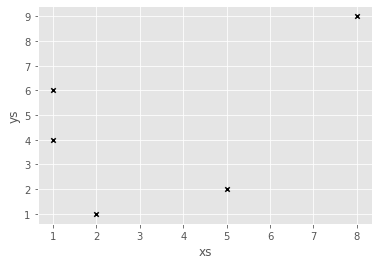

In [62]:
df.plot.scatter("xs", "ys", color = "black", marker = "x")

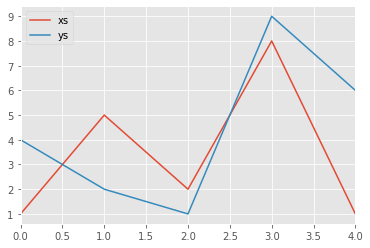

In [63]:
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000170FFC5F848>,
      dtype=object)

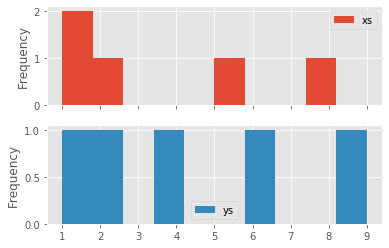

In [65]:
df.plot(kind='hist',subplots=True)

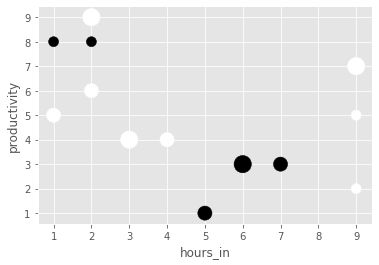

In [66]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 100, c = df.caffienated)

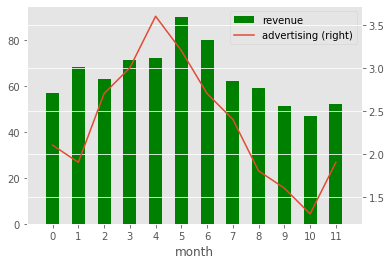

In [67]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)})

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12));
